<a href="https://colab.research.google.com/github/JatinB22/DSlab/blob/main/DSexp2/DSexp2CndCapita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Aim:
To implement and evaluate Linear Regression for predictive modeling using Python, and analyze the relationship between independent and dependent variables.

---
## Software:
 Google Colab, Python Libraries

---
##  Theory:

### 1. Data Preparation

Data preparation is the process of transforming raw data into a clean and usable format for analysis or machine learning. This is a crucial step in any data science or AI project, as the quality of the input data greatly impacts the performance of models.

#### a) Data Cleaning
- **Objective**: To remove or correct inaccurate, corrupted, or irrelevant data.
- **Common tasks** include:
  - Removing **duplicate rows** that might bias the model.
  - Eliminating **irrelevant features** (e.g., user IDs, timestamps).
  - Dropping rows or columns with too many missing values that can’t be reliably imputed.

#### b) Imputation (Handling Missing Values)
- **Missing data** can occur due to various reasons such as human error, system faults, or data collection issues.
- **Numerical variables** are often imputed using:
  - **Mean** or **median**
- **Categorical variables** are typically imputed using:
  - **Mode** (most frequent value)

#### c) Encoding Categorical Variables
- Many machine learning algorithms require input features to be **numerical**.
- **Label Encoding** converts each unique category into an integer label.
- **One-Hot Encoding** creates binary columns for each category (used when there's no ordinal relationship).

---

### 2. Linear Regression

Linear Regression is one of the most fundamental and widely used algorithms in statistics and machine learning. It models the **linear relationship** between an independent variable (or variables) and a **dependent (target) variable**.

#### a) Simple Linear Regression:

- Involves **one independent variable**.
- The model predicts the target variable `y` using the equation:
$$
  [
  y = \beta_0 + \beta_1 x + \varepsilon
  ]
$$
  where:
  - \( y \) is the dependent variable (output),
  - \( x \) is the independent variable (input),
  - \( \beta_0 \) is the intercept,
  - \( \beta_1 \) is the slope,
  - \( \varepsilon \) is the error term.

#### b) Multiple Linear Regression:

- Involves **multiple independent variables**.
- The model equation is:
$$
  [
  y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \varepsilon
  ]
$$

#### c) Model Evaluation Metrics:

- **Mean Squared Error (MSE)**: Measures the average squared difference between actual and predicted values.
- **R² Score (Coefficient of Determination)**: Indicates how well the model explains the variability of the target variable. (1 is perfect; 0 means no explanatory power)

---
### Applications of Linear Regression:

- Predicting house prices based on features (e.g., area, location)
- Forecasting sales or demand
- Estimating relationships in scientific data
---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Convert data to a pandas DataFrame
df = pd.read_csv('canada_per_capita_income.csv')
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [ ]:
df.shape

(47, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               47 non-null     int64  
 1   per_capita_income  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 884.0 bytes


In [ ]:
df = df.rename(columns={'per capita income (US$)':'per_capita_income'})


In [ ]:
# Features and target variable
X = df[['year']]  # Independent variable
y = df['per_capita_income']  # Dependent variable

In [ ]:
# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 15147815.5477862


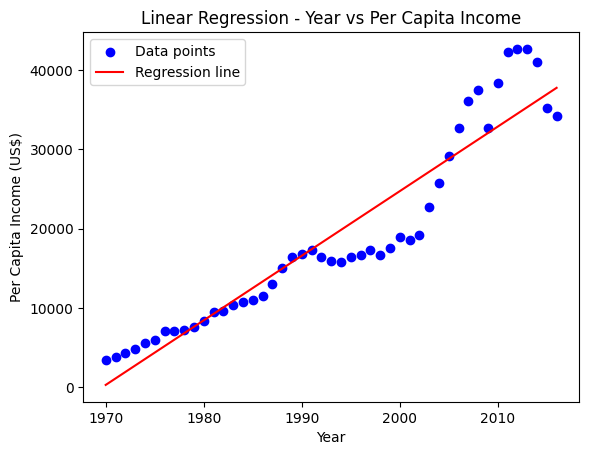

In [ ]:
# Plotting the regression line along with the data points
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('Year')
plt.ylabel('Per Capita Income (US$)')
plt.title('Linear Regression - Year vs Per Capita Income')
plt.legend()
plt.show()


In [ ]:
# Example: Predict per capita income for the year 2020
predicted_income_2020 = model.predict([[2020]])
print(f"Predicted Per Capita Income for the year 2020: {predicted_income_2020[0]}")

Predicted Per Capita Income for the year 2020: 41027.67748165317
